In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix

from imblearn.combine import SMOTETomek


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [163]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/train.csv',encoding='unicode_escape')
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


Data Cleaning

In [164]:
data.dtypes

,0
age,int64
job,object
marital,object
education_qual,object
call_type,object
day,int64
mon,object
dur,int64
num_calls,int64
prev_outcome,object


Data Preprocessing

Missing value

In [165]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education_qual,0
call_type,0
day,0
mon,0
dur,0
num_calls,0
prev_outcome,0


In [166]:
data.duplicated().sum()

6

In [167]:
data=data.drop_duplicates()        #duplicated values dropped


In [168]:
#after droping agin check for no of duplicates
data.duplicated().sum()

0

In [169]:
#checking for the data is balanced or not
data['y'].value_counts()

,count
y,
no,39916
yes,5289


In [170]:

#Finding the percentage of the data
print('Percentage for "no": ',((39916) / (39916+5289)) * 100 )
print('Percentage for "yes": ',((5289) / (39916+5289)) * 100 )

Percentage for "no":  88.29996681782988
Percentage for "yes":  11.700033182170113


Unique Values of Categorical Column

In [171]:

print("Unique values of Job \n")
print(data['job'].unique())

Unique values of Job 

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [172]:
print("Unique values of Marital Status \n")
print(data['marital'].unique())

Unique values of Marital Status 

['married' 'single' 'divorced']


In [173]:
print("Unique values of Educationsl Qualification \n")
print(data['education_qual'].unique())

Unique values of Educationsl Qualification 

['tertiary' 'secondary' 'unknown' 'primary']


In [174]:
print("Unique values of Call Type \n")
print(data['call_type'].unique())

Unique values of Call Type 

['unknown' 'cellular' 'telephone']


In [175]:
print("Unique values of Month \n")
print(data['mon'].unique())

Unique values of Month 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [176]:
print("Unique values of Previous Outcome \n")
print(data['prev_outcome'].unique())

Unique values of Previous Outcome 

['unknown' 'failure' 'other' 'success']


In [177]:
print("Unique values of Target Variable 'y' \n")
print(data['y'].unique())

Unique values of Target Variable 'y' 

['no' 'yes']


**Exploring the Dataset and replace the unknown values**

Converting categorical Target column into numerical column

In [178]:
data['target'] = data["y"].map({"yes":1 , "no": 0})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0


In [179]:
#Age
#no of counts for particular age
data.age.value_counts()

,count
age,
32,2084
31,1996
33,1972
34,1929
35,1894
...,...
93,2
90,2
95,2


In [180]:
#checking for the percentage of how many people get insured? compared with Target vs Age
data.groupby('age')['target'].mean()

,target
age,
18,0.583333
19,0.314286
20,0.300000
21,0.278481
22,0.310078
...,...
90,1.000000
92,1.000000
93,1.000000


In [181]:
#no of counts for particular job
data.job.value_counts()

,count
job,
blue-collar,9730
management,9457
technician,7596
admin.,5170
services,4153
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


In [77]:
#checking for the percentage of how many people get insured? compared with Target vs Job
data.groupby('job')['target'].mean()

,target
job,
admin.,0.122050
blue-collar,0.072765
entrepreneur,0.082717
housemaid,0.087903
management,0.137570
retired,0.227915
self-employed,0.118429
services,0.088851
student,0.286780


In [78]:
# droping the column unknown
#outof 45211 rows, deletion of 288 rows will not get more impact on dataset so planning to delete

#replacing unknown value as null
data['job'] =data['job'].replace('unknown',np.nan)

In [79]:
#counting the no of null value in jab column
data.job.isnull().sum()

288

In [80]:
#removing null values from job column
data=data.dropna(subset=['job'])
#after removing null values checking for the summ of null vaues
data.job.isnull().sum()

0

In [81]:
#no of counts for marital status
data.marital.value_counts()

,count
marital,
married,27007
single,12720
divorced,5190


In [82]:
#checking for the percentage of how many people get insured? compared with Target vs Marital Status
data.groupby('marital')['target'].mean()

,target
marital,
divorced,0.119653
married,0.101233
single,0.149371


In [83]:
#no of counts for Educational qualification
data.education_qual.value_counts()

,count
education_qual,
secondary,23128
tertiary,13260
primary,6799
unknown,1730


In [84]:
#checking for the percentage of how many people get insured? compared with Target vs Educational Qualification
data.groupby('education_qual')['target'].mean()

,target
education_qual,
primary,0.086483
secondary,0.105543
tertiary,0.150226
unknown,0.135260


In [85]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((1730) / (23202+13301+6851+1730)) * 100 )

Percentage for "Unknown":  3.8372815189424188


In [86]:
#replacing unknown value as null
data['education_qual'] =data['education_qual'].replace('unknown',np.nan)


#checking for null values
data.education_qual.isnull().sum()

1730

In [87]:
#droping the null values
data = data. dropna(subset=['education_qual'])


#checking for null value after deleting
data.education_qual.isnull().sum()

0

In [88]:
#no of counts for Call type
data.call_type.value_counts()

,count
call_type,
cellular,28210
unknown,12283
telephone,2694


In [89]:

#checking for the percentage of how many people get insured? compared with Target vs Call Type
data.groupby('call_type')['target'].mean()

,target
call_type,
cellular,0.147572
telephone,0.129918
unknown,0.041358


In [90]:
#no of counts for Day
data.day.value_counts()

,count
day,
20,2628
18,2227
21,1961
17,1872
6,1817
5,1796
14,1784
8,1758
7,1739


In [91]:

#checking for the percentage of how many people get insured? compared with Target vs Day
data.groupby('day')['target'].mean()

,target
day,
1,0.278689
2,0.139179
3,0.166506
4,0.160350
5,0.114143
6,0.094111
7,0.086832
8,0.105802
9,0.113284


In [92]:
#no of counts for month
data.mon.value_counts()


,count
mon,
may,13191
jul,6600
aug,6035
jun,4978
nov,3842
apr,2820
feb,2533
jan,1318
oct,690


In [93]:
#checking for the percentage of how many people get insured? compared with Target vs Month
data.groupby('mon')['target'].mean()

,target
mon,
apr,0.192553
aug,0.109196
dec,0.465000
feb,0.165022
jan,0.100152
jul,0.088788
jun,0.105062
mar,0.537946
may,0.067319


In [94]:
#no of counts for duration
data.dur.value_counts()

,count
dur,
124,176
90,172
89,172
114,172
122,169
...,...
1327,1
1331,1
1608,1


In [95]:
#checking for the percentage of how many people get insured? compared with Target vs Duration
data.groupby('dur')['target'].mean()

,target
dur,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3366,0.0
3422,0.0
3785,0.0


In [96]:
#no of counts for number of calls
data.num_calls.value_counts()

,count
num_calls,
1,16740
2,11936
3,5277
4,3397
5,1703
6,1234
7,696
8,516
9,307


In [97]:
#checking for the percentage of how many people get insured? compared with Target vs Numer of Calls
data.groupby('num_calls')['target'].mean()

,target
num_calls,
1,0.145221
2,0.110841
3,0.111237
4,0.088902
5,0.079859
6,0.072123
7,0.064655
8,0.058140
9,0.065147


In [98]:
#no of counts for previous outcome
data.prev_outcome.value_counts()

,count
prev_outcome,
unknown,35280
failure,4709
other,1774
success,1424


In [99]:
#checking for the percentage of how many people get insured? compared with Target vs Previous outcome
data.groupby('prev_outcome')['target'].mean()

,target
prev_outcome,
failure,0.124655
other,0.165163
success,0.643961
unknown,0.091383


In [100]:
#no of counts of target variable y
data.y.value_counts()

,count
y,
no,38166
yes,5021


In [101]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43187 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43187 non-null  int64 
 1   job             43187 non-null  object
 2   marital         43187 non-null  object
 3   education_qual  43187 non-null  object
 4   call_type       43187 non-null  object
 5   day             43187 non-null  int64 
 6   mon             43187 non-null  object
 7   dur             43187 non-null  int64 
 8   num_calls       43187 non-null  int64 
 9   prev_outcome    43187 non-null  object
 10  y               43187 non-null  object
 11  target          43187 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


**Outlier Deduction and Correction**

<Axes: xlabel='age'>

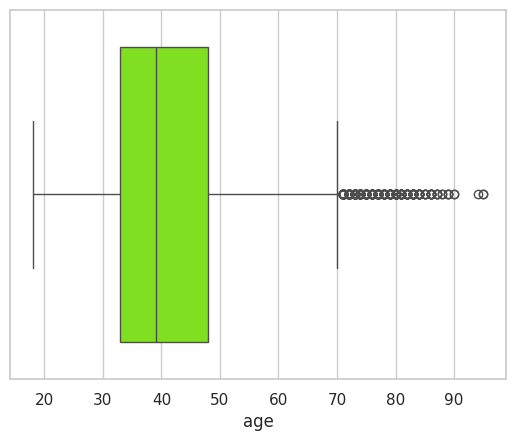

In [103]:
#Age - Box plot
#Outlier Detuction using Box Plot for Age Column
sns.set(style="whitegrid")
sns.boxplot(x=data['age'], color='Chartreuse')

In [105]:
#IQR

#detecting Outlier for Age column
q1,q3=np.percentile(data["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


In [106]:

#removing outlier for age column
# Clip/ Strip is used to detuct value to lower & upper threshold.
data.age = data.age.clip(10.5,70.5)

In [107]:
data.age.describe()

,age
count,43187.000000
mean,40.702549
std,10.305239
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,70.500000


<Axes: xlabel='age'>

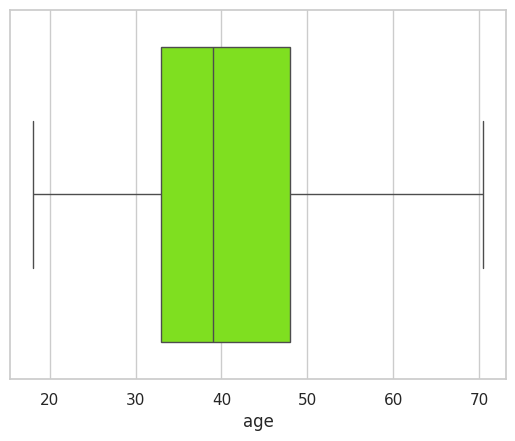

In [109]:
#Checking- After outlier removal
sns.set(style="whitegrid")
sns.boxplot(x=data['age'], color='Chartreuse')

<Axes: xlabel='day'>

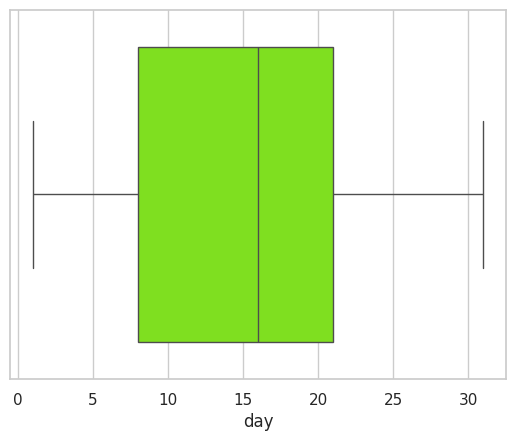

In [110]:
#Day
#Outlier Detuction using Box Plot for day Column
sns.set(style="whitegrid")
sns.boxplot(x=data['day'], color='Chartreuse')

In [111]:
#detecting Outlier for Age column
q1,q3=np.percentile(data["day"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 40.5 Lower bound : -11.5


<Axes: ylabel='dur'>

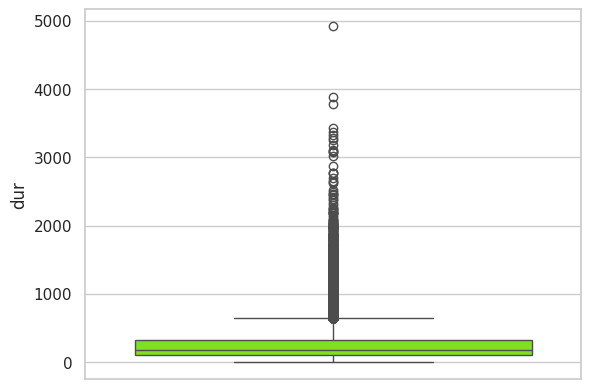

In [112]:
#Duration
#Outlier Detuction using Box Plot for duration Column
sns.set(style="whitegrid")
sns.boxplot(data['dur'], color='Chartreuse')

In [113]:
#detecting Outlier for Duration column
q1,q3=np.percentile(data["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 640.5 Lower bound : -219.5


In [114]:

#removing outlier for duration column
# Clip/ Strip is used to detuct value to lower & upper threshold.
data.dur = data.dur.clip(-219.5,640.5)

<Axes: ylabel='dur'>

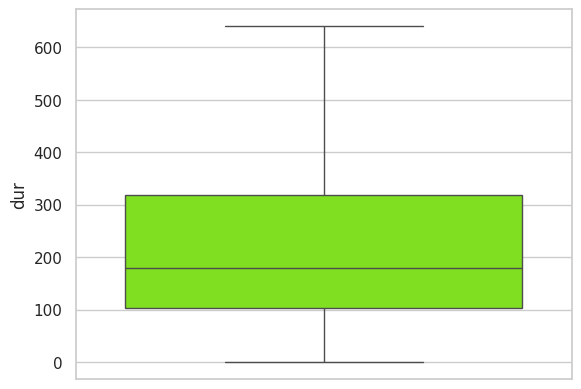

In [115]:
sns.set(style="whitegrid")
sns.boxplot(data['dur'], color='Chartreuse')

<Axes: ylabel='num_calls'>

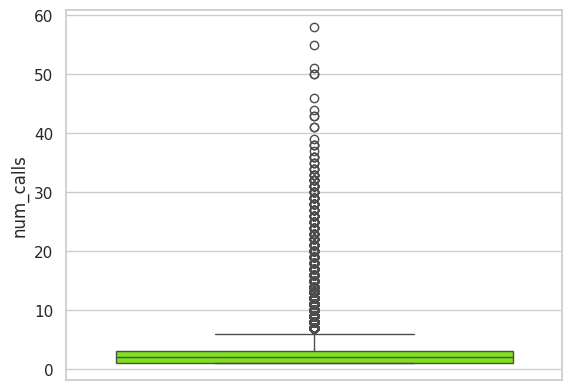

In [116]:
#checking for outlier using boxplot fot the column no of calls
sns.set(style="whitegrid")
sns.boxplot(data['num_calls'], color='Chartreuse')

In [117]:

#detecting Outlier for number of calls column
q1,q3=np.percentile(data["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [118]:
#removing outlier for num_calls column
# Clip/ Strip is used to detuct value to lower & upper threshold.
data.num_calls = data.num_calls.clip(-2,6.0)

<Axes: ylabel='num_calls'>

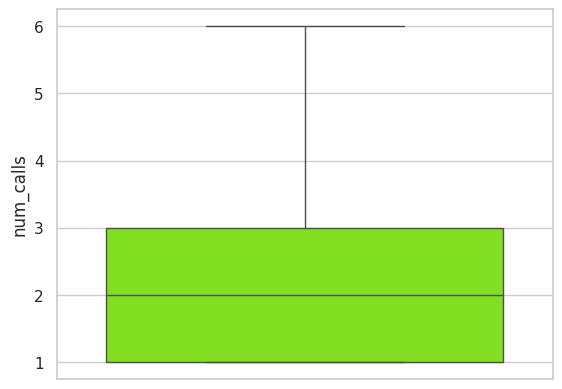

In [119]:
sns.set(style="whitegrid")
sns.boxplot(data['num_calls'], color='Chartreuse')


**Exploratory Data Analysis**

<ipython-input-121-69abae33839f>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['marital'],order=data.marital.value_counts().index, palette=custom_colors)
<ipython-input-121-69abae33839f>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['education_qual'],order=data.education_qual.value_counts().index, palette=custom_colors)
<ipython-input-121-69abae33839f>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['call_type'],order=data.call_type.value_counts().index, palette=custom_colors)
<ipython-input-121-69abae33839f>:

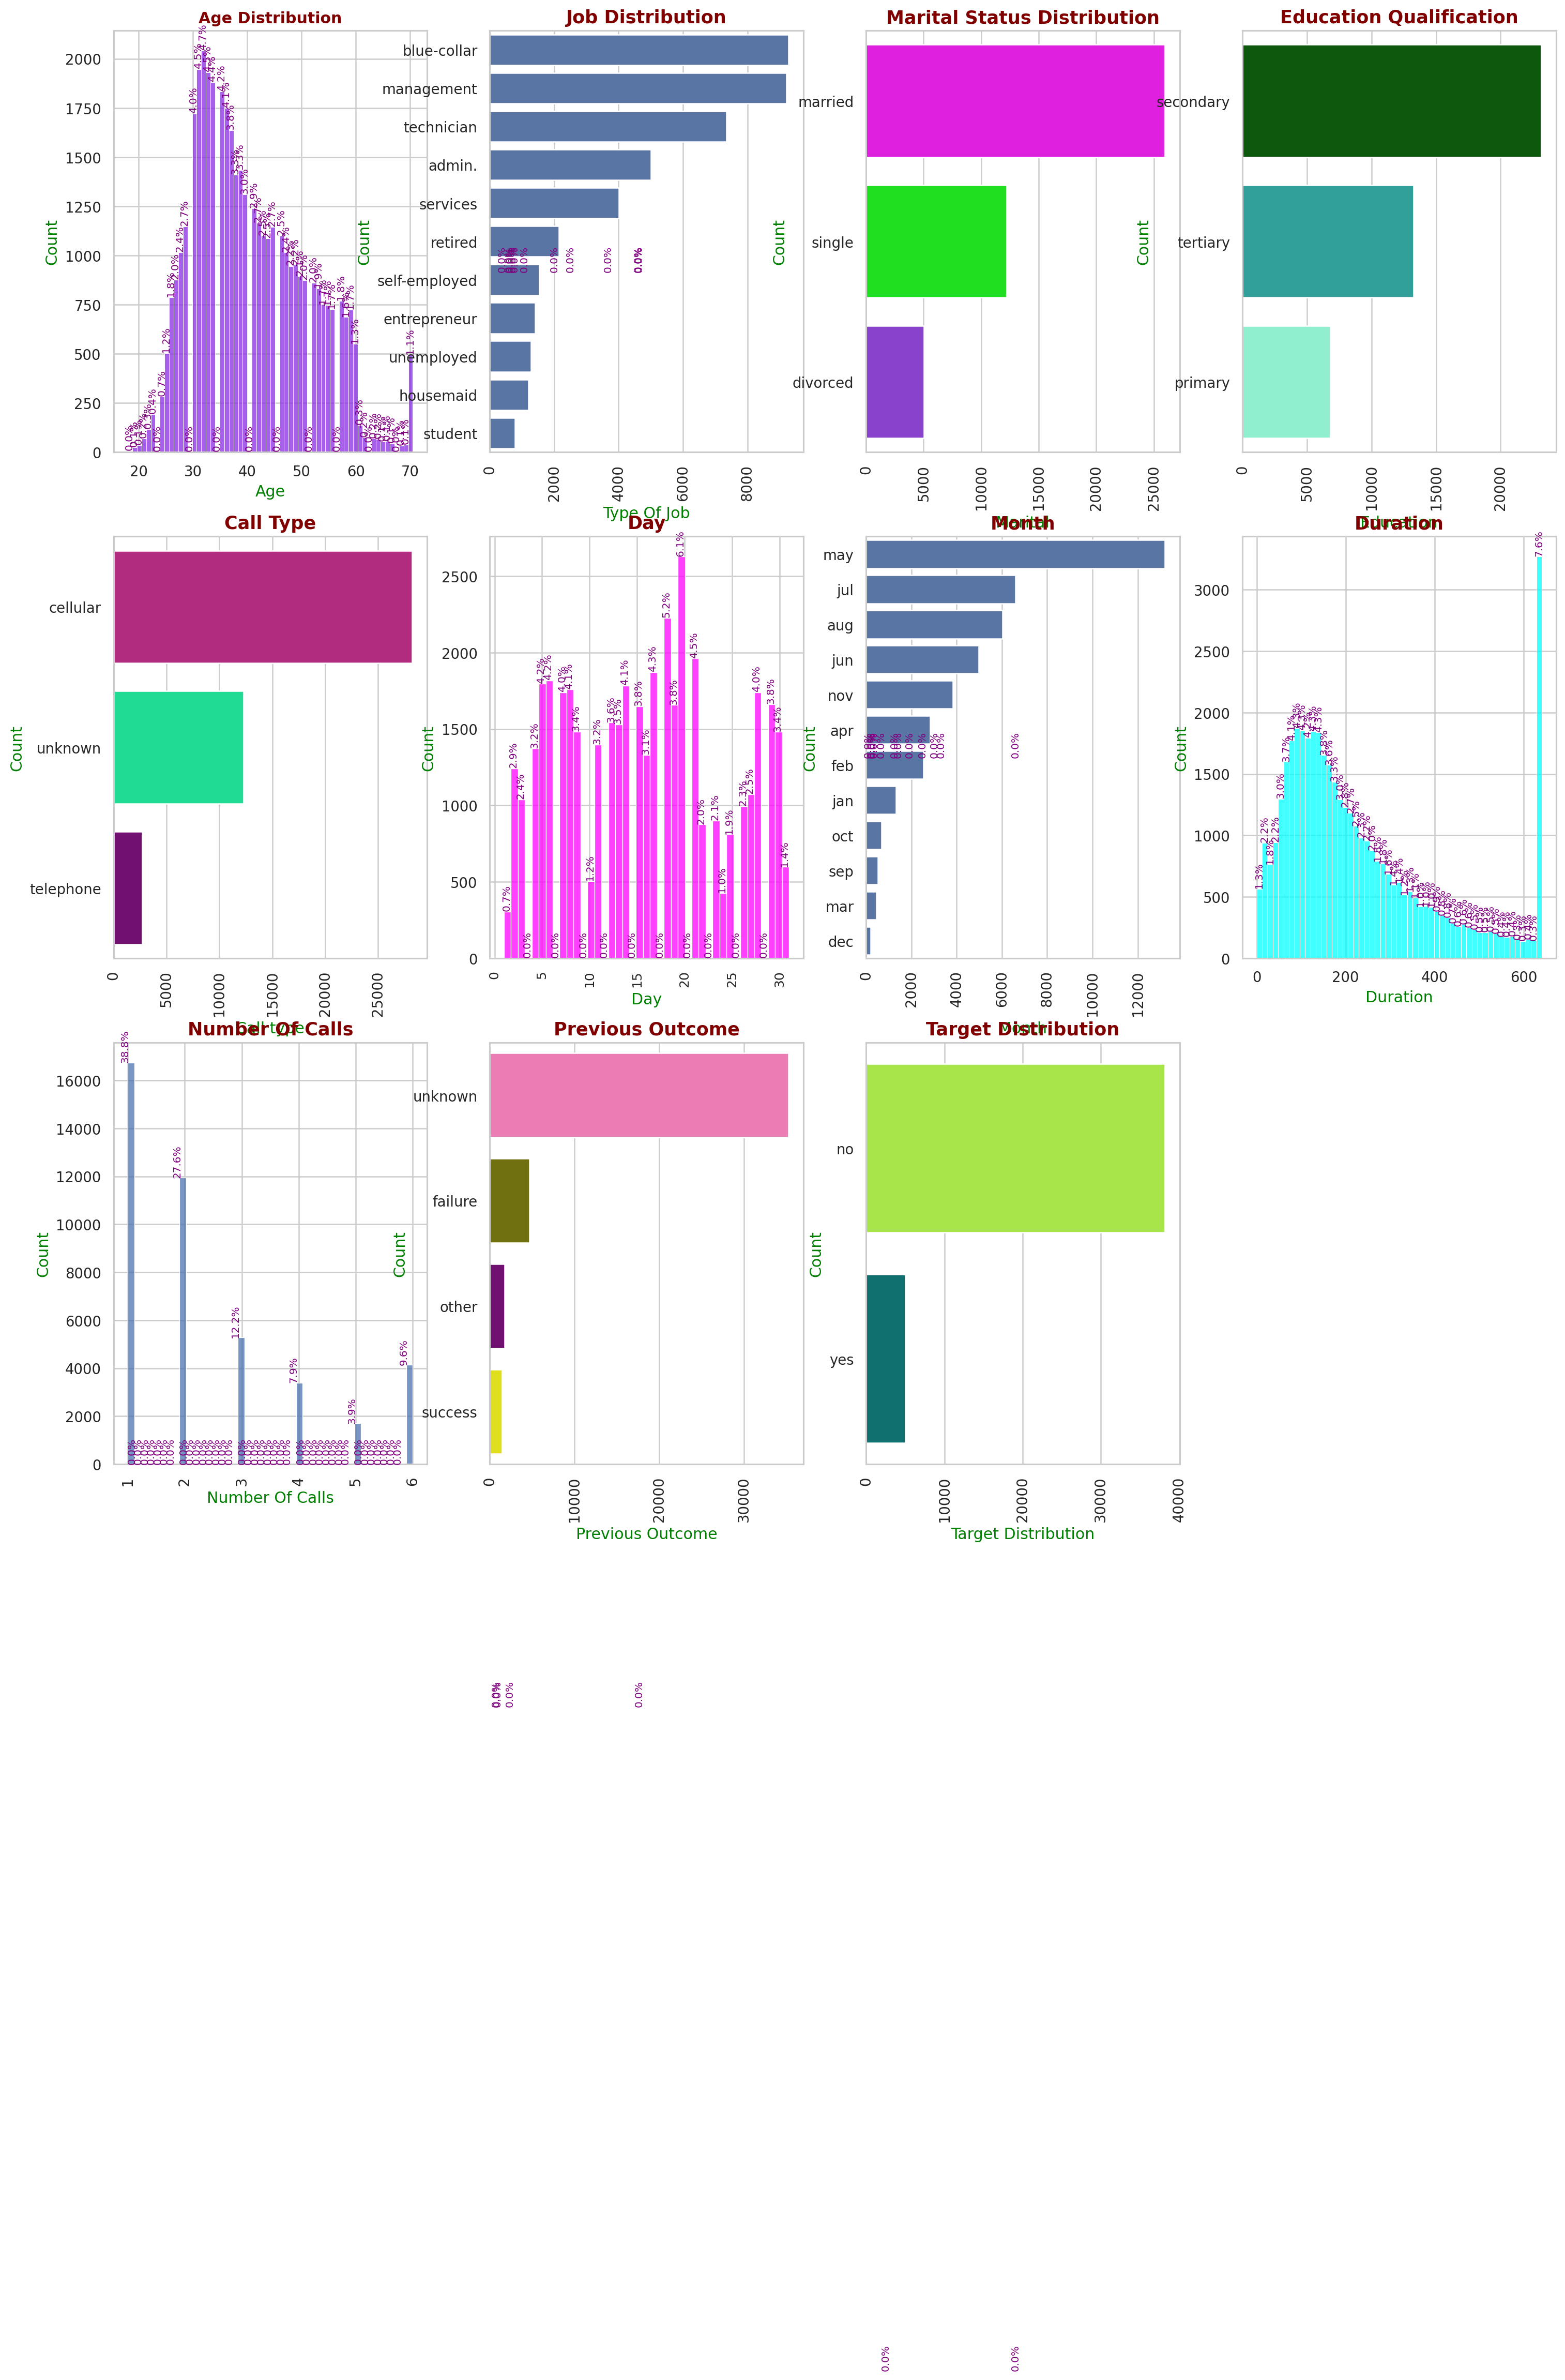

In [121]:
#Distribution of Feature and Target variable
# Age distribution
plt.figure(figsize = (20,20),dpi=180)
plt.subplot(3,4,1)
sns.histplot((data.age),color='BlueViolet')

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(data['age']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Age Distribution', fontsize = 12, color='maroon', fontweight='bold')
plt.xlabel('Age',fontsize = 12, color='green')
plt.ylabel('Count',fontsize = 12, color='green')




#Job distribution
plt.subplot(3,4,2)
sns.countplot(data['job'],order=data.job.value_counts().index)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(data['job']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Job Distribution', fontsize = 14, color="maroon", fontweight='bold')
plt.xlabel('Type Of Job',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')



# Marital distribution
plt.subplot(3,4,3)
custom_colors = {'married': 'Magenta', 'divorced': 'BlueViolet', 'single': 'Lime'}
sns.countplot(data['marital'],order=data.marital.value_counts().index, palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(data['marital']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Marital Status Distribution', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Marital',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')



# Education qualification distribution
plt.subplot(3,4,4)
custom_colors = {'secondary': 'DarkGreen', 'tertiary': 'LightSeaGreen', 'primary': 'Aquamarine'}
sns.countplot(data['education_qual'],order=data.education_qual.value_counts().index, palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(data['education_qual']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Education Qualification', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Education',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')




# Call type distribution
plt.subplot(3,4,5)
custom_colors = {'cellular': 'MediumVioletRed', 'telephone': 'purple', 'unknown' :'MediumSpringGreen'}
sns.countplot(data['call_type'],order=data.call_type.value_counts().index, palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(data['call_type']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Call Type', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Call type',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')




# Day distribution
plt.subplot(3,4,6)
sns.histplot(data['day'], color="Fuchsia")

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(data['day']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Day', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Day',fontsize = 12, color='green')
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('Count',fontsize = 12, color='green')




 # Mon distribution
plt.subplot(3,4,7)
sns.countplot(data['mon'],order=data.mon.value_counts().index)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(data['mon']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Month', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Month',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')




# Dur distribution
plt.subplot(3,4,8)
sns.histplot((data.dur),color = 'cyan')

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(data['dur']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Duration', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Duration',fontsize = 12, color='green')
plt.ylabel('Count',fontsize = 12, color='green')




# Num call distribution
plt.subplot(3,4,9)
sns.histplot(data['num_calls'])

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(data['num_calls']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Number Of Calls', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Number Of Calls',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')


# Previous outcome distribution
plt.subplot(3,4,10)
custom_colors = {'unknown': 'HotPink', 'failure': 'Olive', 'other': 'Purple', 'success':'Yellow'}
sns.countplot(data['prev_outcome'],order=data.prev_outcome.value_counts().index, palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(data['prev_outcome']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Previous Outcome', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Previous Outcome',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')


 # Target distribution
plt.subplot(3,4,11)
custom_colors = {'no': 'GreenYellow', 'yes': 'Teal'}
sns.countplot(data['y'], palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(data['y']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Target Distribution', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Target Distribution',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')

plt.tight_layout()


plt.show()

**Features vs Target**

Categorical Variable vs Target (Categorical)

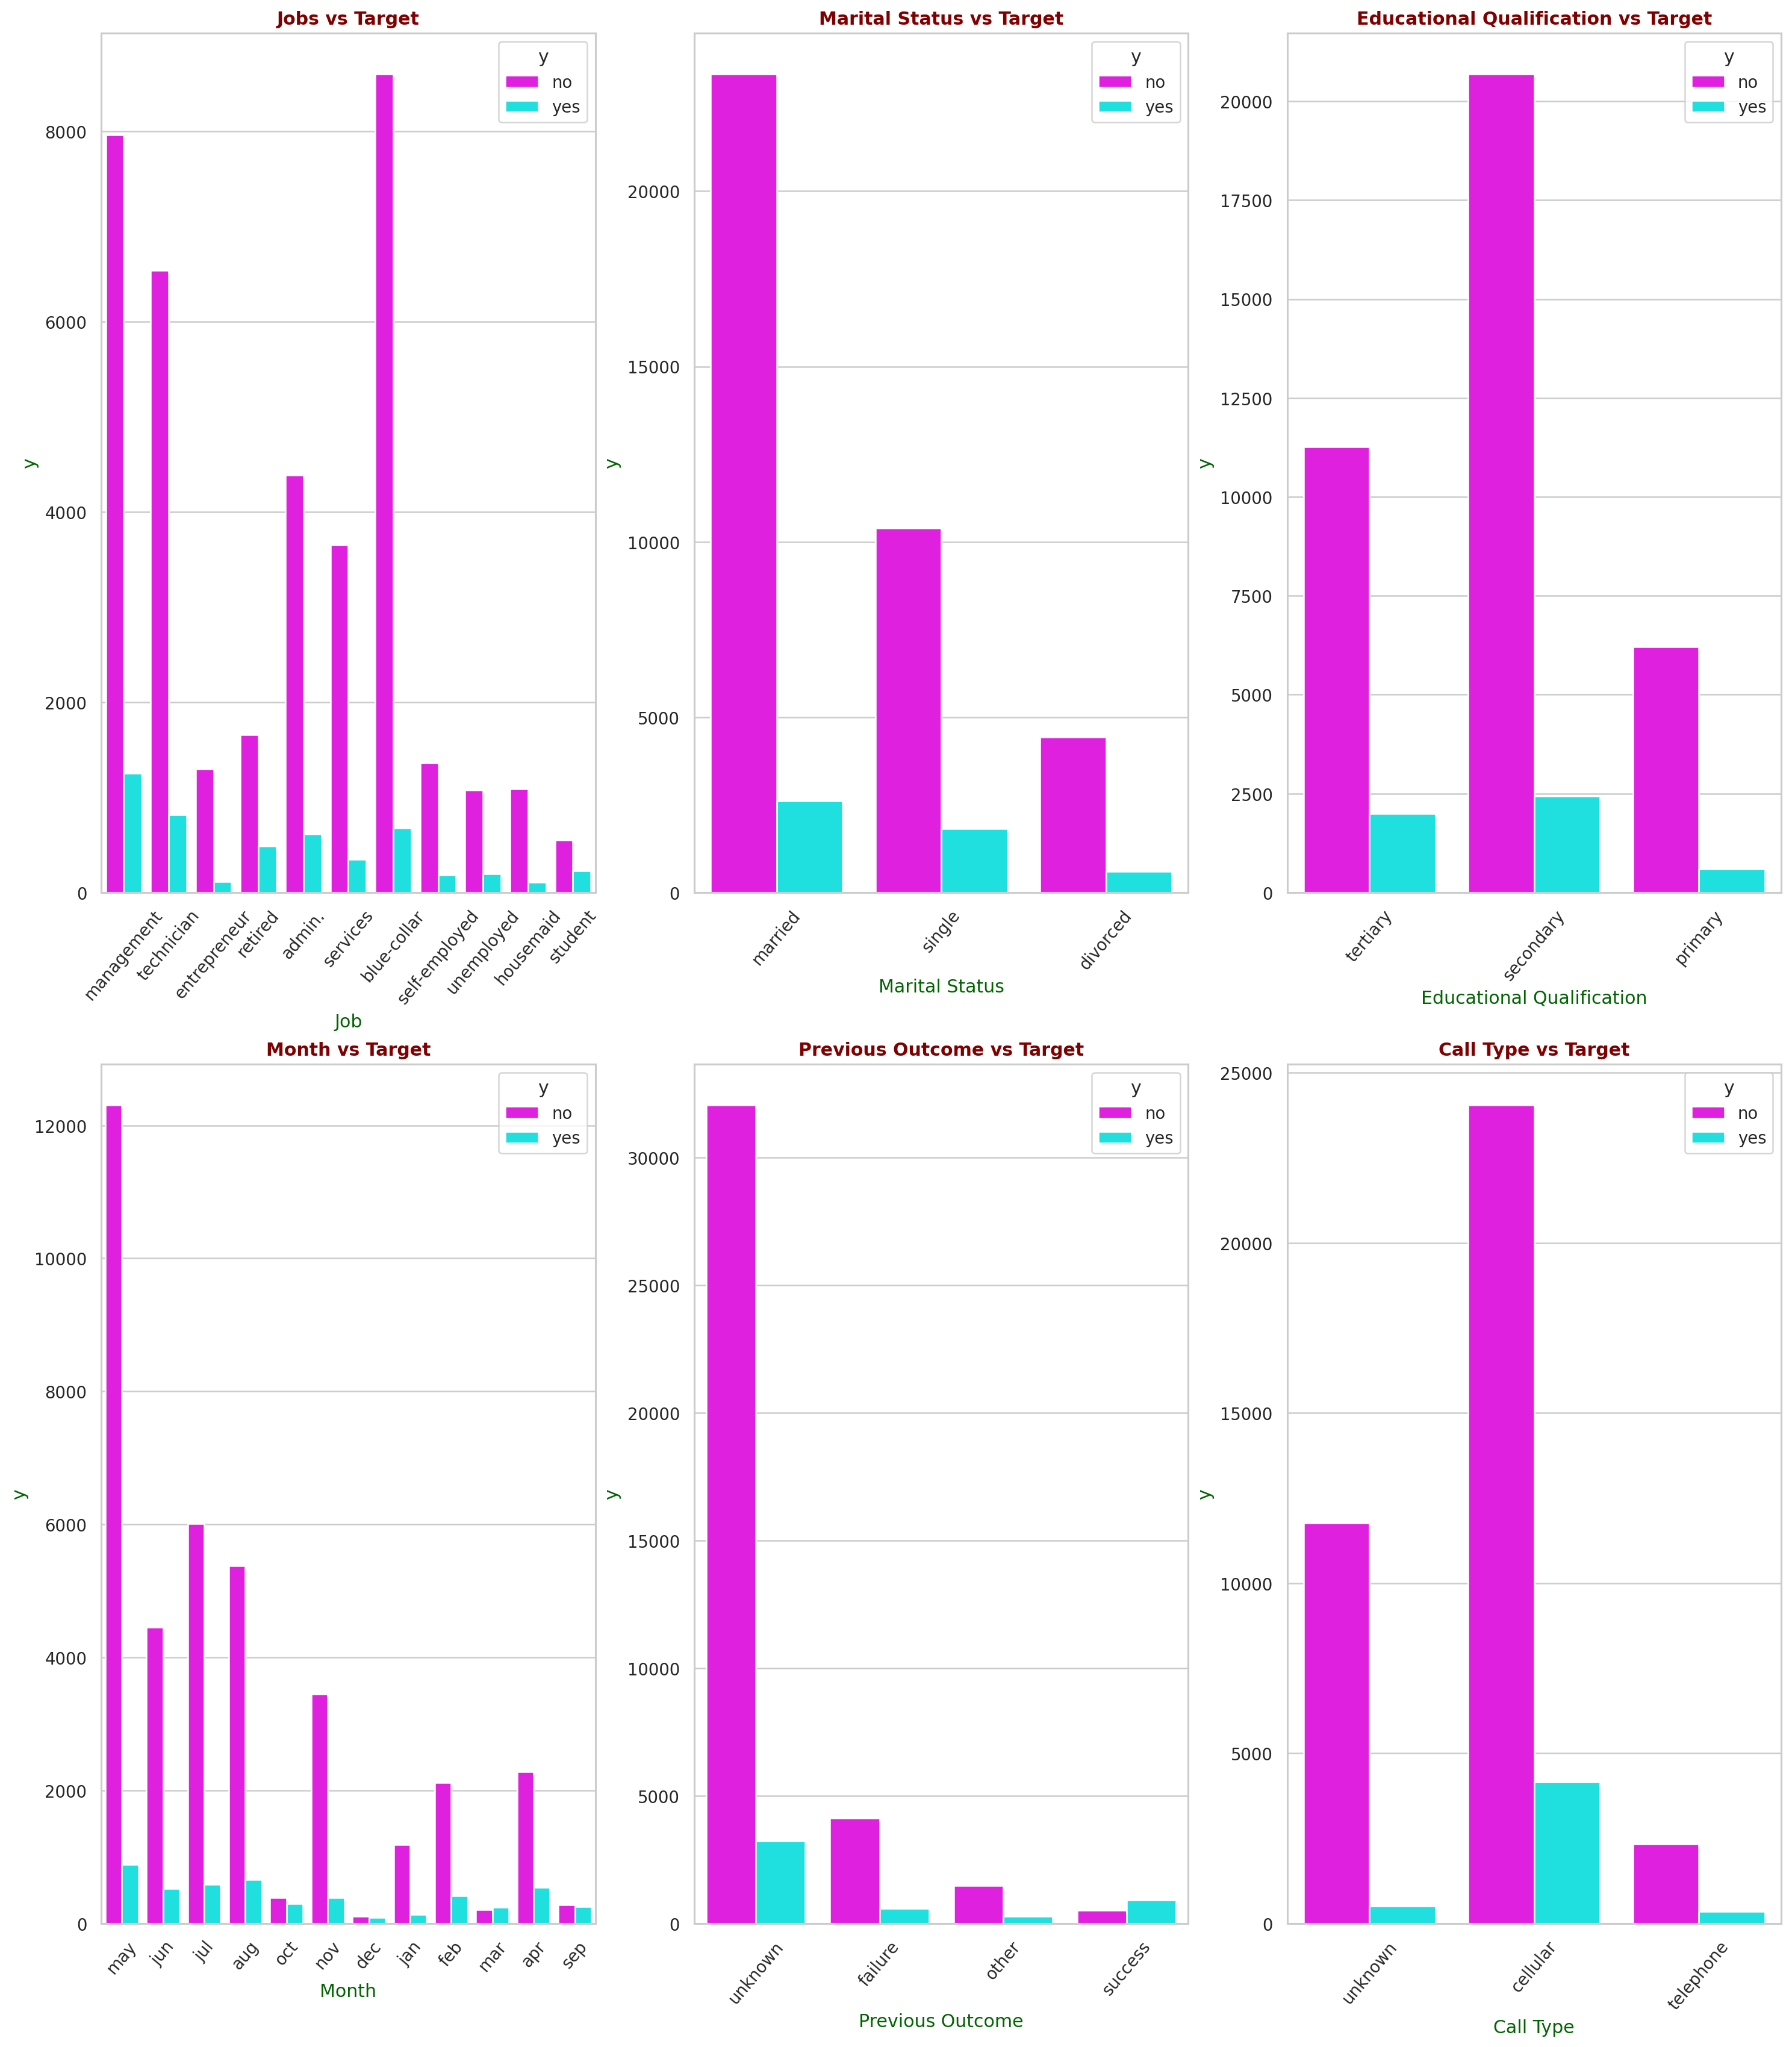

In [122]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='job',hue='y',data=data, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='marital',hue='y',data=data, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='education_qual',hue='y',data=data, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='mon',hue='y',data=data, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,5)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='prev_outcome',hue='y',data=data, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,6)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='call_type',hue='y',data=data, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()

**Feature VS Target Distribution - Percentage of people Subscribed**

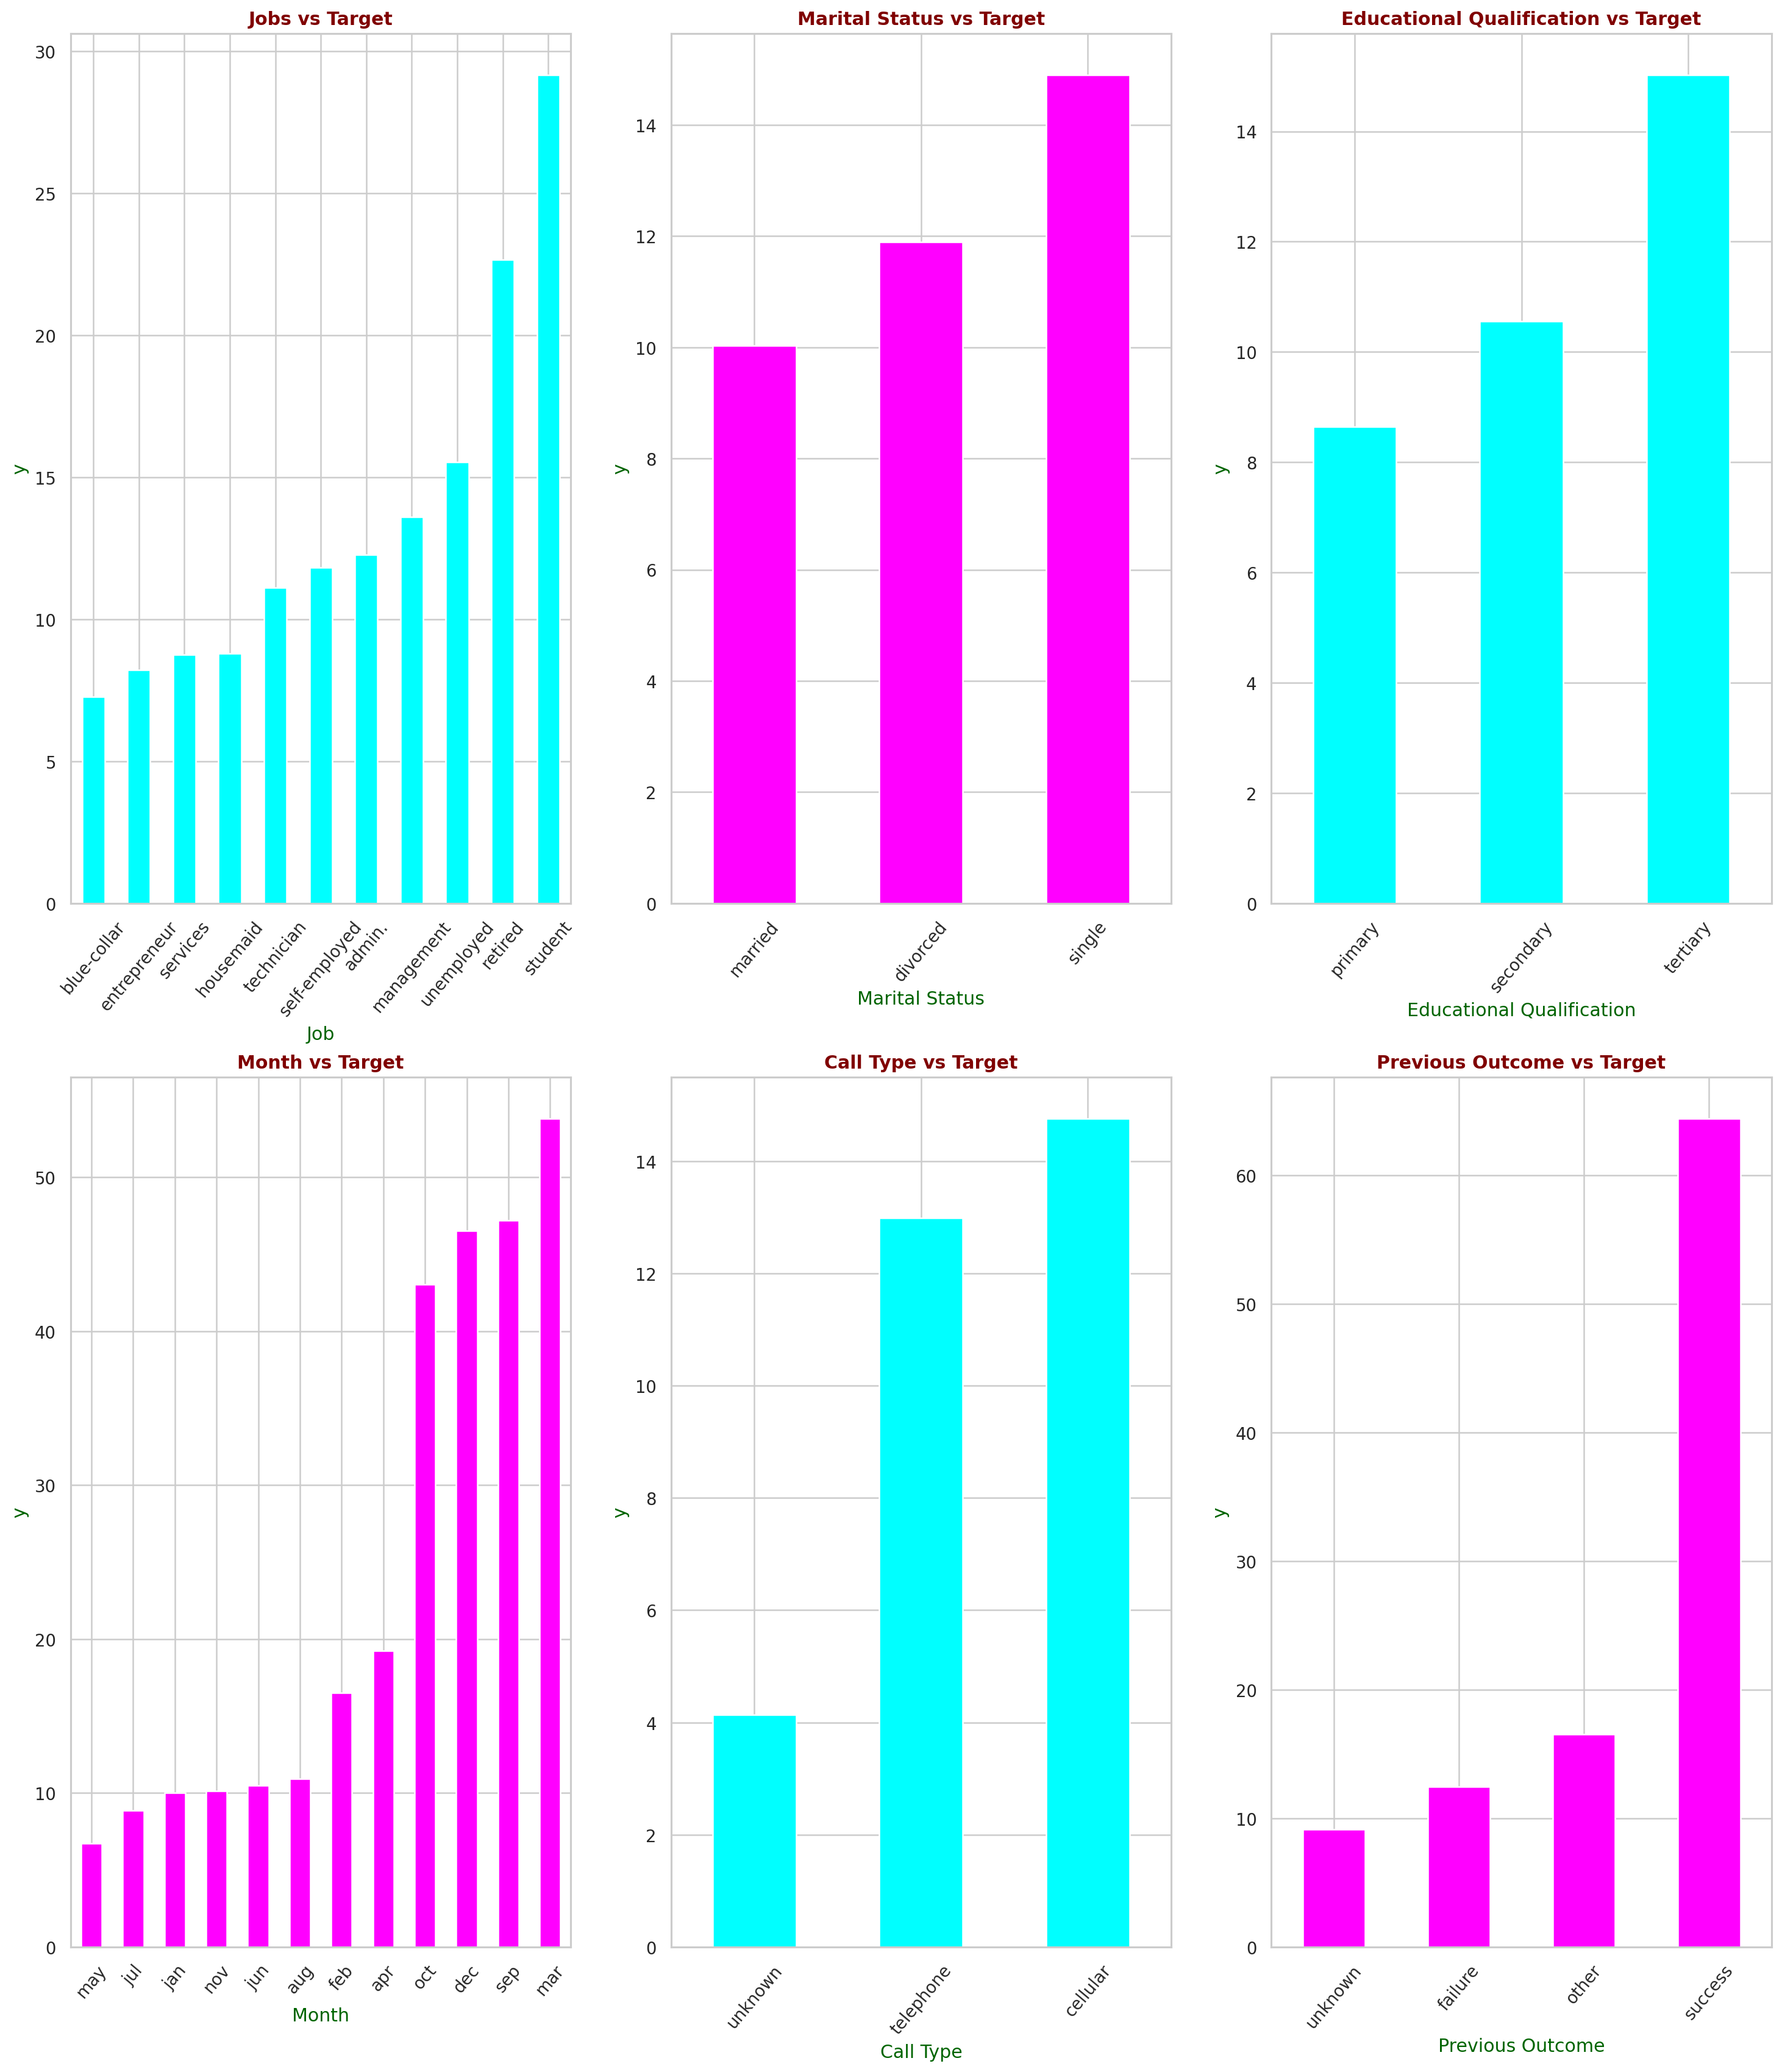

In [124]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')

#Jobs vs Target
plt.subplot(3,3,1)
(data.groupby('job')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
(data.groupby('marital')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
(data.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
(data.groupby('mon')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,5)
(data.groupby('call_type')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,6)
(data.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon')
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')


plt.show()

**Numerical Variable vs Target**

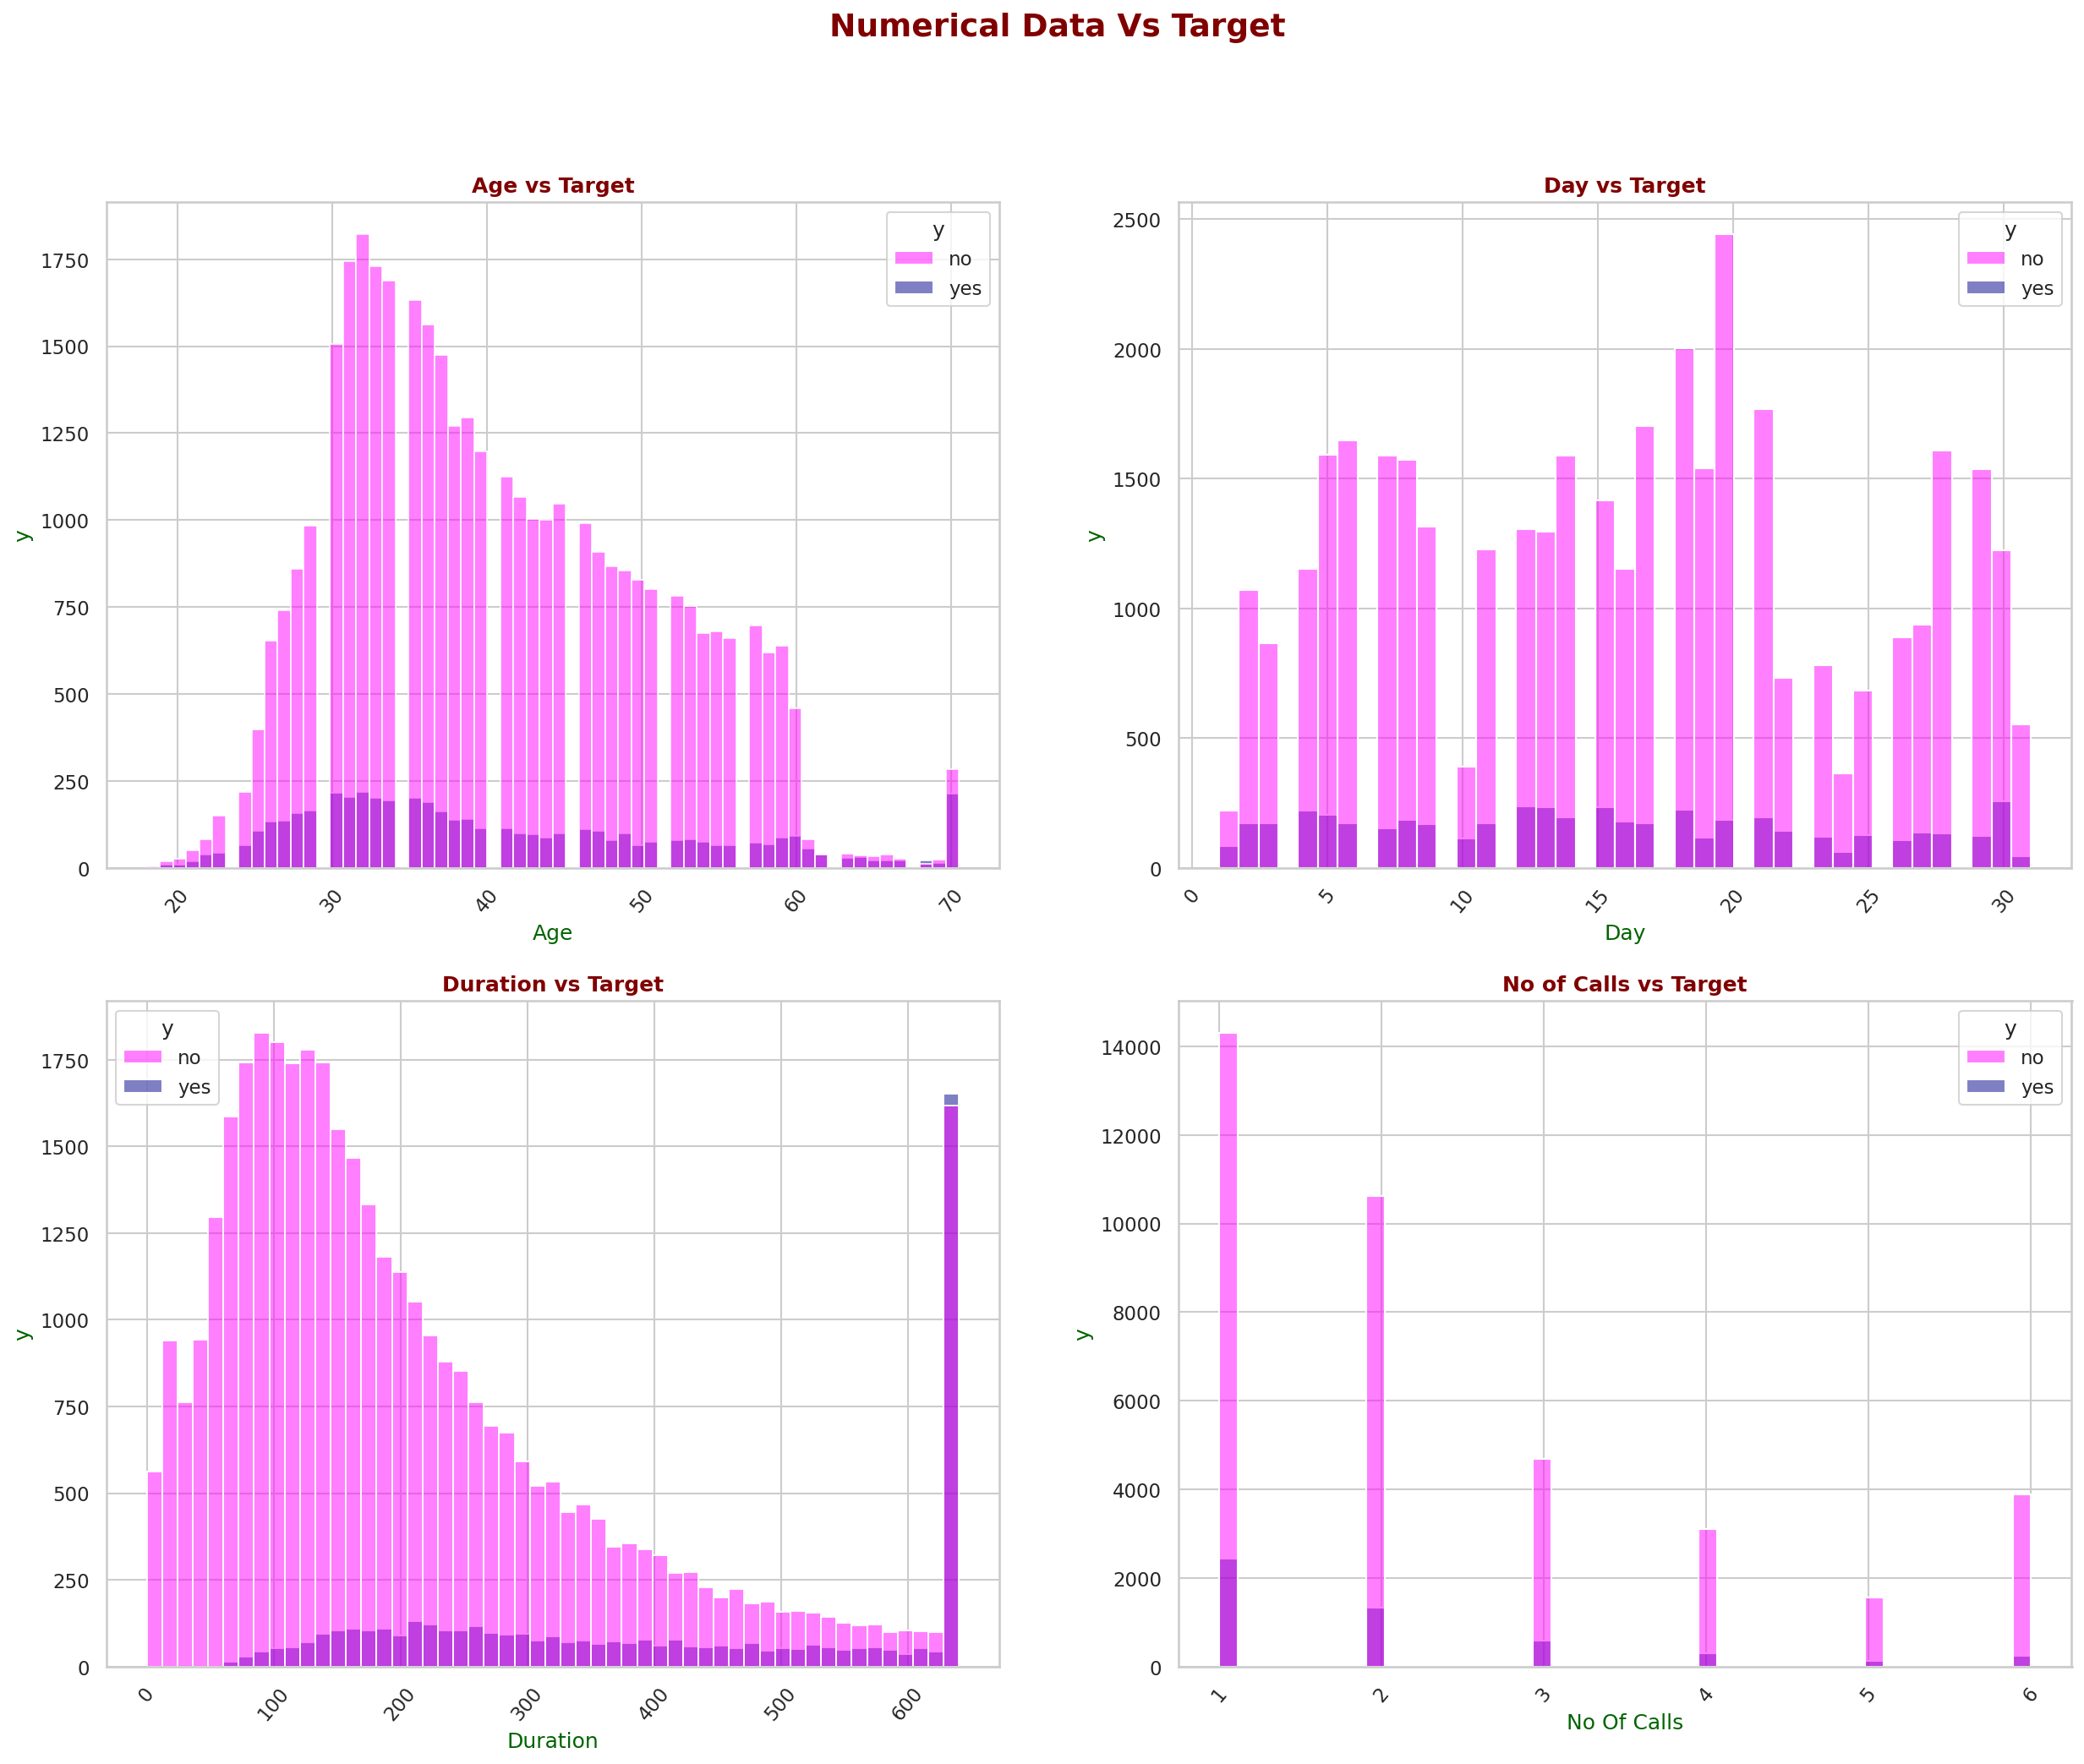

In [125]:
plt.figure(figsize=(20, 15), dpi=150)
#sub title to show title for overall plot
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon')

#Age vs Target
plt.subplot(2,2,1)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='age',hue='y',data=data, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#data[['age','target']].corr()

#Day vs Target
plt.subplot(2,2,2)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='day',hue='y',data=data, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#data[['day','target']].corr()

#Duration vs Target
plt.subplot(2,2,3)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='dur',hue='y',data=data, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#No of Calls vs Target
plt.subplot(2,2,4)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='num_calls',hue='y',data=data, palette=my_colors)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()

**Encoding**

In [126]:
#Encoding for job column (Label Encoding)
data['job']=data['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,married,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,single,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,married,secondary,unknown,5,may,76.0,1,unknown,no,0


In [127]:
#Encoding for Marital status (Label Encoding)
data['marital'] =data['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,secondary,unknown,5,may,76.0,1,unknown,no,0


In [128]:
#encoding for educational qualification (Label Encoding)
data['education_qual'] = data['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,may,76.0,1,unknown,no,0


In [129]:
# Encoding for month column (Label Encoding)
data['mon']=data['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,1,76.0,1,unknown,no,0


In [130]:
# Encoding for call type column (Label Encoding)
data['call_type'] = data['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,1,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,1,5,1,76.0,1,unknown,no,0


In [131]:
# Encoding for previous outcome column (Label Encoding)
data['prev_outcome']=data['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,1,no,0
1,44.0,5,3,2,1,5,1,151.0,1,1,no,0
2,33.0,2,1,2,1,5,1,76.0,1,1,no,0


**Feature and Target Selection**

In [133]:

x = data[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=data['target'].values

In [134]:
# splitting the data as train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

In [136]:
smt = SMOTETomek(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.vali

In [137]:
print(len(x_train_smt))
print(len(y_train_smt))

60728
60728


In [138]:
#scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

**Modelling**



**Logistic Regression**

In [182]:
lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.8096781662421857

In [187]:
#y_pred=lr.predict_proba(x_test_scaled)
y_pred_prob = lr.predict_proba(x_test_scaled)
y_pred = (y_pred_prob[:, 1] >= 0.5).astype(int)

In [189]:
log_reg_f1 = f1_score(y_test, y_pred)

print("F1 score for logistic regression:", round(log_reg_f1, 2))

F1 score for logistic regression: 0.49


In [188]:

log_reg_f1 = f1_score(y_test,y_pred[:,1])
print("F1 score for logistic regression  :  ",round(log_reg_f1,2))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

**K-Nearest Neighbour (KNN)**

In [190]:

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt)
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))


K value : 1 Train Score :  0.999934132525359 Cross Value Accuracy : 0.8680245751255311
K value : 2 Train Score :  0.9901528125411672 Cross Value Accuracy : 0.8885161849276855
K value : 3 Train Score :  0.959985509155579 Cross Value Accuracy : 0.8844653931161753
K value : 4 Train Score :  0.9582729548149124 Cross Value Accuracy : 0.8926835221664307
K value : 5 Train Score :  0.9406204716111184 Cross Value Accuracy : 0.8908316703145788
K value : 6 Train Score :  0.9402911342379133 Cross Value Accuracy : 0.893841331917085
K value : 7 Train Score :  0.9290113292056382 Cross Value Accuracy : 0.892568586112184
K value : 8 Train Score :  0.9289783954683177 Cross Value Accuracy : 0.8939568044289944
K value : 9 Train Score :  0.9213213015412989 Cross Value Accuracy : 0.8944196332775418
K value : 10 Train Score :  0.9202015544724015 Cross Value Accuracy : 0.8953458274322991
K value : 20 Train Score :  0.8970820708734027 Cross Value Accuracy : 0.8940724110553194
K value : 30 Train Score :  0.8864

In [192]:
# Initialize the KNN classifier with i (the number of neighbors)
knn = KNeighborsClassifier(i)

# Fit the model on the training data
knn.fit(x_train_scaled, y_train_smt)

# Print the KNN model score on the test set
print("KNN Score: ", knn.score(x_test_scaled, y_test))

# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = knn.predict_proba(x_test_scaled)[:, 1]

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the F1 score using the binary class labels
f1 = f1_score(y_test, y_pred)

print("F1 on the sampled dataset: ", round(f1, 2))

KNN Score:  0.8251910164389905
F1 on the sampled dataset:  0.51


**Decision Tree**

In [194]:
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(x_train_smt, y_train_smt)

# Print the Decision Tree model score on the training set
print("Decision Tree Score: ", dt.score(x_train_smt, y_train_smt))

# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = dt.predict_proba(x_test)[:, 1]

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the F1 score using the binary class labels
f1 = f1_score(y_test, y_pred)

print("F1 on the sampled dataset: ", round(f1, 2))

Decision Tree Score:  0.999934132525359
F1 on the sampled dataset:  0.47


In [195]:
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7219404558029245  Cross val score :  0.8850428897901377
Depth  :  2  Training Accuracy :  0.777450270056646  Cross val score :  0.8936105210076821
Depth  :  3  Training Accuracy :  0.8006850217362667  Cross val score :  0.895462775202781
Depth  :  4  Training Accuracy :  0.8392174944012647  Cross val score :  0.895463177546028
Depth  :  5  Training Accuracy :  0.8606244236595969  Cross val score :  0.8968523346637485
Depth  :  6  Training Accuracy :  0.8753128705045449  Cross val score :  0.8947672578430111
Depth  :  7  Training Accuracy :  0.8881899617968647  Cross val score :  0.8939566703145788
Depth  :  8  Training Accuracy :  0.9039652219733896  Cross val score :  0.8917574621260889
Depth  :  9  Training Accuracy :  0.9139276775128442  Cross val score :  0.8912936944766319
Depth  :  10  Training Accuracy :  0.9234290607298116  Cross val score :  0.8904849845500195
Depth  :  20  Training Accuracy :  0.9937425899091029  Cross val score :  0.871382

In [197]:
# Initialize the Decision Tree classifier with max_depth=5
dt = DecisionTreeClassifier(max_depth=5)

# Fit the model on the training data
dt.fit(x_train_smt, y_train_smt)

# Print the Decision Tree model score on the training set
print("Decision Tree Score: ", dt.score(x_train_smt, y_train_smt))

# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = dt.predict_proba(x_test)[:, 1]

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the F1 score using the binary class labels
f1 = f1_score(y_test, y_pred)

print("F1 on the sampled dataset: ", round(f1, 2))

Decision Tree Score:  0.8606244236595969
F1 on the sampled dataset:  0.49


**XG Boost**

In [198]:
# Define StratifiedKFold
skf = StratifiedKFold(n_splits=10)

for lr in [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.5, 0.7, 1]:
    model = xgb.XGBClassifier(learning_rate=lr, n_estimators=100, verbosity=0)
    model.fit(x_train_smt, y_train_smt)  # train the model

    # Train score
    train_score = model.score(x_train_smt, y_train_smt)

    # Cross-validation score
    cross_val_scores = []
    for train_index, val_index in skf.split(x_test, y_test):
        x_train_fold, x_val_fold = x_test[train_index], x_test[val_index]
        y_train_fold, y_val_fold = y_test[train_index], y_test[val_index]

        model.fit(x_train_fold, y_train_fold)
        fold_score = model.score(x_val_fold, y_val_fold)
        cross_val_scores.append(fold_score)

    print("Learning rate:", lr, "Train score:", train_score, "Cross-Val score:", np.mean(cross_val_scores))

Learning rate: 0.01 Train score: 0.9017586615729153 Cross-Val score: 0.8911779537358913
Learning rate: 0.02 Train score: 0.9196581478066131 Cross-Val score: 0.8945355081326982
Learning rate: 0.03 Train score: 0.9289619285996575 Cross-Val score: 0.8981250804686495
Learning rate: 0.04 Train score: 0.9363884863654327 Cross-Val score: 0.8995139693575384
Learning rate: 0.05 Train score: 0.9405546041364774 Cross-Val score: 0.9000932095189048
Learning rate: 0.1 Train score: 0.951801475431432 Cross-Val score: 0.8995138352431227
Learning rate: 0.11 Train score: 0.9533658279541563 Cross-Val score: 0.8993986309600446
Learning rate: 0.12 Train score: 0.9551442497694639 Cross-Val score: 0.8962722898158878
Learning rate: 0.13 Train score: 0.9549960479515215 Cross-Val score: 0.8999770664349172
Learning rate: 0.14 Train score: 0.9564286655249638 Cross-Val score: 0.8981253486974807
Learning rate: 0.15 Train score: 0.9572520089579766 Cross-Val score: 0.8985885798892751
Learning rate: 0.2 Train score: 0.

**Random Forest**

In [199]:
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [200]:
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.9937425899091029  Cross val score :  0.8834119714385553
Depth  :  2  Training Accuracy :  0.9937425899091029  Cross val score :  0.8855248764619473
Depth  :  3  Training Accuracy :  0.9937425899091029  Cross val score :  0.8906480625663569
Depth  :  4  Training Accuracy :  0.9937425899091029  Cross val score :  0.894497656610721
Depth  :  5  Training Accuracy :  0.9937425899091029  Cross val score :  0.8975656488376906
Depth  :  6  Training Accuracy :  0.9937425899091029  Cross val score :  0.899215507178489
Depth  :  7  Training Accuracy :  0.9937425899091029  Cross val score :  0.9034413339847172
Depth  :  8  Training Accuracy :  0.9937425899091029  Cross val score :  0.9040202051858749
Depth  :  9  Training Accuracy :  0.9937425899091029  Cross val score :  0.9047437774278778
Depth  :  10  Training Accuracy :  0.9937425899091029  Cross val score :  0.9050042946075649
